In [1]:
import pandas as pd

In [2]:
file_path = r"C:\Users\hp\Downloads\OnlineRetail.csv"
df = pd.read_csv(file_path, encoding = 'latin1')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [3]:
# Check the missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
# Check for duplicate row in the entire dataframe
print(f"Number of duplicates rows: {df.duplicated().sum()}")

Number of duplicates rows: 5268


In [5]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Data Cleaning
# Removing duplicate rows and keep the first occurence
df.drop_duplicates(inplace = True)

# Verifying the duplicate rows has been removed
print(f"Number of duplicate row after removal: {df.duplicated().sum()}")

Number of duplicate row after removal: 0


In [7]:
# Remove rows where CustomerID is missing
df.dropna(subset=['CustomerID'], inplace = True)
print(f"Checking missing values: \n{df.isnull().sum()}")

Checking missing values: 
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [9]:
# Create our main sales DataFrame containing only positive quantities
sales_df = df[df['Quantity'] > 0]

In [10]:
# Display the final shape to confirm it's correct
print(f"Final sales DataFrame size: {sales_df.shape}")

Final sales DataFrame size: (392732, 8)


In [11]:
# Creating revenue column
sales_df['Revenue'] = sales_df['Quantity'] * sales_df['UnitPrice']

print(sales_df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom    15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom    20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom    22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom    20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom    20.34  


C:\Users\hp\AppData\Local\Temp\ipykernel_26424\264879015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Revenue'] = sales_df['Quantity'] * sales_df['UnitPrice']


In [12]:
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'])

C:\Users\hp\AppData\Local\Temp\ipykernel_26424\2721241166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'])


In [13]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
 8   Revenue      392732 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


In [14]:
snapshot_date = sales_df['InvoiceDate'].max() + pd.DateOffset(days=1)

In [15]:
# RFM Calculation
rfm_df = sales_df.groupby('CustomerID').agg(
    # Recency: Calculate the difference between the snapshot date and the max InvoiceDate
    Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),

    # Frequency: Count the number of unique InvoiceNo (orders)
    Frequency=('InvoiceNo', 'nunique'),

    # Monetary: Sum the Revenue
    Monetary=('Revenue', 'sum')
).reset_index()

In [16]:
# First few rows of the RFM table
print(f"RFM DataFrame Head: \n{rfm_df.head()}")

RFM DataFrame Head: 
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


In [17]:
# Displaying descriptive statistics to check for outliers
print(f"RFM Descriptive Statistics: \n{rfm_df.describe()}")

RFM Descriptive Statistics: 
         CustomerID      Recency    Frequency       Monetary
count   4339.000000  4339.000000  4339.000000    4339.000000
mean   15299.936852    92.518322     4.271952    2048.215924
std     1721.889758   100.009747     7.705493    8984.248352
min    12346.000000     1.000000     1.000000       0.000000
25%    13812.500000    18.000000     1.000000     306.455000
50%    15299.000000    51.000000     2.000000     668.560000
75%    16778.500000   142.000000     5.000000    1660.315000
max    18287.000000   374.000000   210.000000  280206.020000


In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [20]:
# --- Log Transformation ---
rfm_df_log = rfm_df.copy()

In [21]:
# Add a small constant (e.g., 0.001) to handle the min Monetary value of 0, as log(0) is undefined.
rfm_df_log['Recency_log'] = np.log(rfm_df_log['Recency'])
rfm_df_log['Frequency_log'] = np.log(rfm_df_log['Frequency'])
rfm_df_log['Monetary_log'] = np.log(rfm_df_log['Monetary'] + 0.001)

In [22]:
# --- Scaling (Standardization) ---
features = ['Recency_log', 'Frequency_log', 'Monetary_log']
X = rfm_df_log[features]

In [23]:
# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Create a final DataFrame from the scaled array
rfm_scaled_df = pd.DataFrame(X_scaled, columns=features, index=rfm_df_log.index)

In [25]:
# Display the descriptive statistics of the scaled data (it should now have a mean of ~0 and std of ~1)
print("\nScaled RFM Descriptive Statistics:")
print(rfm_scaled_df.describe())


Scaled RFM Descriptive Statistics:
        Recency_log  Frequency_log  Monetary_log
count  4.339000e+03   4.339000e+03  4.339000e+03
mean  -1.981463e-16  -1.146301e-16  6.550290e-18
std    1.000115e+00   1.000115e+00  1.000115e+00
min   -2.630378e+00  -1.048362e+00 -1.055592e+01
25%   -6.122687e-01  -1.048362e+00 -6.709942e-01
50%    1.148932e-01  -2.788459e-01 -6.061848e-02
75%    8.298694e-01   7.383990e-01  6.511526e-01
max    1.506044e+00   4.887874e+00  4.664112e+00


In [26]:
 # Machine Learning — K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [27]:
# --- Elbow Method ---
# We will test K values from 1 to 10
inertia = []
for k in range(1, 11):
    # Initialize KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Fit the scaled data
    kmeans.fit(X_scaled)
    # Append the inertia
    inertia.append(kmeans.inertia_)

# Print the inertia values (for analysis)
print("\nInertia Values for K=1 to 10:")
for k, inert in enumerate(inertia):
    print(f"K={k+1}: {inert:.2f}")


Inertia Values for K=1 to 10:
K=1: 13017.00
K=2: 6448.46
K=3: 4905.14
K=4: 4017.98
K=5: 3453.52
K=6: 2974.72
K=7: 2680.72
K=8: 2468.82
K=9: 2276.76
K=10: 2109.74


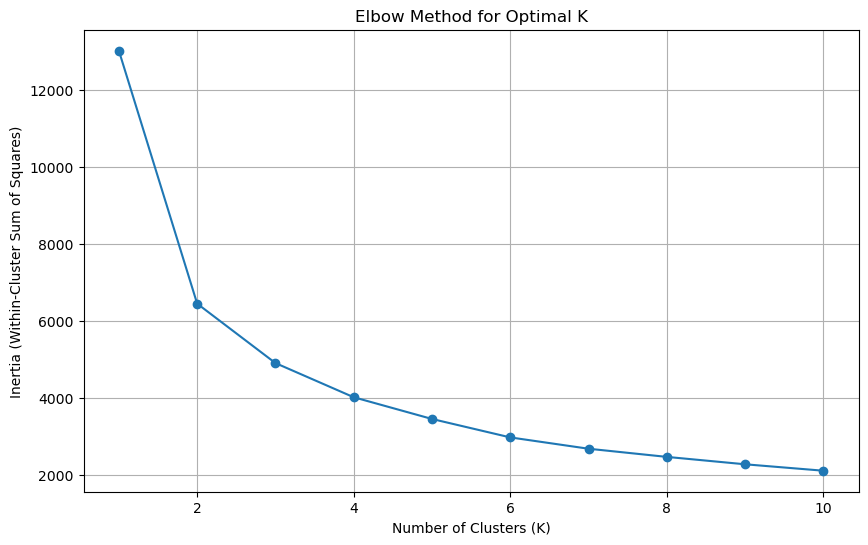

In [28]:
# Plot the elbow curve (visualization for Task 4.1.2)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [29]:
# --- K-Means Final Model (K=5) ---
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [42]:
# Add the cluster labels back to our original RFM DataFrame
rfm_df['Cluster'] = kmeans.labels_

# Display the size of each cluster
print(f"Customer Counts per Cluster:\n")
print(rfm_df.groupby('Cluster')['CustomerID'].count().sort_values(ascending=False))

Customer Counts per Cluster:

Cluster
3    1233
4     993
0     958
1     729
2     426
Name: CustomerID, dtype: int64


In [41]:
# --- Calculate Mean RFM for Each Cluster ---
# Group the RFM DataFrame by the 'Cluster' label and find the mean for R, F, and M
cluster_profiles = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().sort_values(by='Monetary', ascending=False)

# Display the cluster profiles
print(f"Cluster Profiles (Mean RFM Values):\n")
print(cluster_profiles)

Cluster Profiles (Mean RFM Values):

            Recency  Frequency      Monetary
Cluster                                     
2          6.854460  17.532864  11327.378333
4         31.585096   5.869084   2382.938037
0        119.850731   2.614823   1097.101255
1         19.632373   1.850480    448.848807
3        193.044607   1.123277    257.302896


In [48]:
# --- Mapping the Cluster Labels to Business Names ---
# Based on the mean RFM values, create a dictionary to map the labels (0-4) to names.
cluster_names = {
    2: 'Champions',          # Highest F, Highest M, Lowest R (Best Customers)
    4: 'Loyal & High-Value', # High F, High M, Low R
    0: 'Potentials',         # Medium R, Medium F, Medium M
    1: 'Newbies',            # Lowest R, but Lowest F and M (New, Low Spenders)
    3: 'At Risk/Losing'      # Highest R, Lowest F, Lowest M (Worst Segment)
}

# Add the business name to the RFM DataFrame
rfm_df['Segment'] = rfm_df['Cluster'].map(cluster_names)

In [49]:
# Display the final count by the new business segment name
print(f"Final Customer Count by Business Segment:\n")
print(rfm_df.groupby('Segment')['CustomerID'].count().sort_values(ascending=False))

Final Customer Count by Business Segment:

Segment
At Risk/Losing        1233
Loyal & High-Value     993
Potentials             958
Newbies                729
Champions              426
Name: CustomerID, dtype: int64


---